In [2]:
import numpy as np
import matplotlib.pyplot as plt

masses = {}
list_pdg = [211,-211,111,321,-321,2212,-2212,3122,-3122]
list_mass = [0.14,0.14,0.135,0.494,0.494,0.9383,0.9383,1.11568,1.11568]

for k,v in zip(list_pdg,list_mass):
    masses[k]=v

import os

dir_list = os.listdir("./")
plot_list = ["./"+e+"/Plots"+"/" for e in dir_list if "grid" in e]
plot_list.sort()

def labeling_barocco(name):
    params = {}
    params['grid'] = name[6:9]  # int(name[6:9])
    params['Rg'] = name[11:14]  # float(name[11:14])
    params['alphamix'] = name[22:26]  # float(name[22:26])
    params['system'] = name[32:36]  # int(name[32:36])
    params['centrality'] = name[46:51]  # name[46:51]
    params['etaS'] = name[55:59]  # float(name[55:59])
    params['ecrit'] = name[64:67]  # float(name[64:67])
    
    return params

def load_plot_data(list_dir,data_type="yspectra.txt"):
    plot_data = {}
    list_dir2 = [l+data_type for l in list_dir]
    for k, dir in enumerate(list_dir2):
        plot_data[k] = {'dir': dir, 'params': labeling_barocco(dir), 'data': np.loadtxt(dir)}
    
    return plot_data


In [3]:
data_file = "./dN_deta/HEPData-ins1507090-v1-DN_DETARAP.csv"
dNdeta_data = np.genfromtxt(data_file, skip_header=133,max_rows=34,delimiter=',')
# simul = np.loadtxt("v2.txt",unpack=True)

eta = dNdeta_data[:,0]
dNdeta = dNdeta_data[:,3]
Deta = np.sqrt(dNdeta_data[:,4]**2+dNdeta_data[:,6 ]**2)

<ErrorbarContainer object of 3 artists>

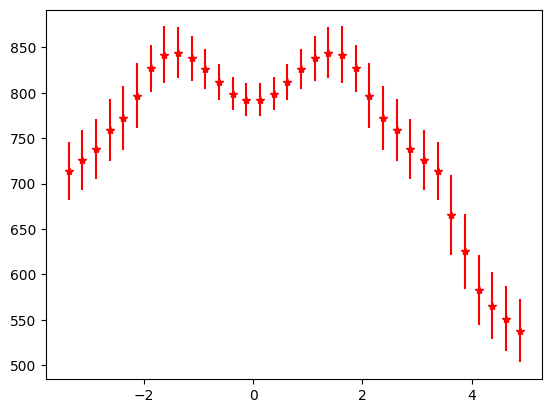

In [6]:
plt.errorbar(eta,dNdeta,yerr=Deta,fmt='r*')
# plt.yscale("log")


In [7]:
ydata = load_plot_data(plot_list,"yspectra.txt") 
meanmt_data = load_plot_data(plot_list,"meanmt0_midrapidity.txt") 
meanpt_data = load_plot_data(plot_list,"meanpt_midrapidity.txt") 

In [60]:
def pseudorapidity(rap,pt,mt):
    return np.arcsinh(mt*np.sinh(rap)/pt)

def deta_dy(y,pt,mt):
    return (mt*np.cosh(y))/(np.sqrt(pt**2 +(mt**2)*np.sinh(y)**2))

def dy_deta(y,mass,mt): #https://arxiv.org/pdf/nucl-ex/0105013.pdf
    return np.sqrt(1-(mass/(mt*np.cosh(y)))**2)

def deta_dy(y,mass,mt): 
    return np.sqrt(1-(mass/(mt*np.cosh(y))**2))

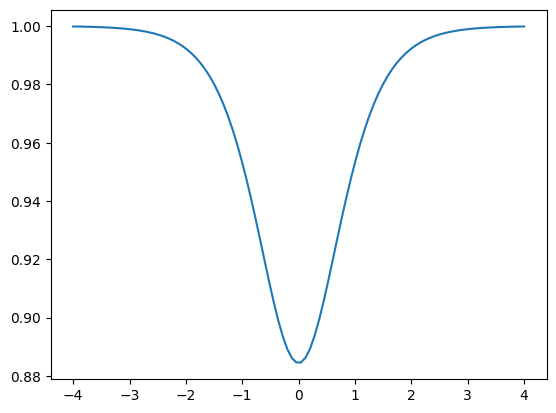

In [61]:
y_plot = np.linspace(-4,4,100)
test = dy_deta(y_plot,0.14,0.3)
plt.plot(y_plot,test)

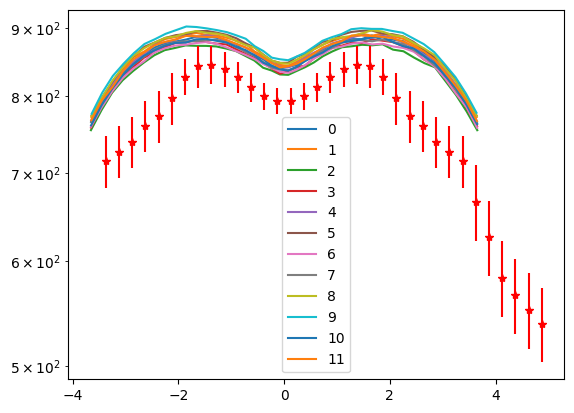

In [80]:
for k in ydata:
    all_data = ydata[k]['data']
    all_meanmt = meanmt_data[k]['data']
    all_meanpt = meanpt_data[k]['data']
    ybin_center = all_data[:,0]
    ybin_left=ybin_center-0.2
    ybin_right=ybin_center+0.2
    count = 1
    yparticle_list = []
    etaparticle_list = []
    eta_bin=[]
    eta_left=[]
    eta_right=[]
    crazy_jacobian=[]
 
    for pdg_n in masses:
        # if(pdg_n != 2):
        yparticle_list.append(all_data[:,count])
        crazy_jacobian.append(dy_deta(ybin_center,masses[pdg_n],meanmt_data[k]['data'][count-1]+masses[pdg_n]))
        eta_bin.append(pseudorapidity(ybin_center,meanpt_data[k]['data'][count-1],meanmt_data[k]['data'][count-1]))
        eta_left.append(pseudorapidity(ybin_left,meanpt_data[k]['data'][count-1],meanmt_data[k]['data'][count-1]))
        eta_right.append(pseudorapidity(ybin_right,meanpt_data[k]['data'][count-1],meanmt_data[k]['data'][count-1]))
        # etaparticle_list.append(pseudorapidity(all_data[:,count]))
        count+=1
    # plt.plot(eta_bin[0],yparticle_list[0]/(2000*(eta_right[0]-eta_left[0])),label=str(k))
    # plt.plot(eta_bin[0],yparticle_list[0]/(2000*(eta_right[0]-eta_left[0])),label=str(k))
    plt.plot(eta_bin[0],yparticle_list[1]*crazy_jacobian[1]/(2000*0.2)+yparticle_list[0]*crazy_jacobian[0]/(2000*0.2)+yparticle_list[3]*crazy_jacobian[3]/(2000*0.2)
    +yparticle_list[4]*crazy_jacobian[4]/(2000*0.2)+yparticle_list[5]*crazy_jacobian[5]/(2000*0.2),label=str(k))
    # plt.plot(ybin_center,yparticle_list[1]*crazy_jacobian[1]/(2000*0.2),label=str(k)) 
plt.errorbar(eta,dNdeta,yerr=Deta,fmt='r*')
plt.yscale("log")

plt.legend()
plt.show()


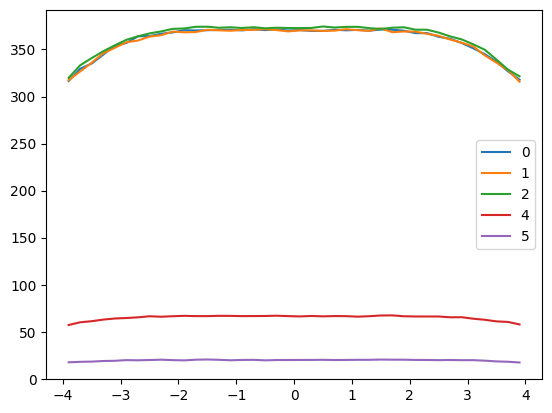

In [78]:
plt.plot(ybin_center,yparticle_list[0]/(2000*0.2),label=str(0))
plt.plot(ybin_center,yparticle_list[1]/(2000*0.2),label=str(1))
plt.plot(ybin_center,yparticle_list[3]/(2000*0.2),label=str(3))
plt.plot(ybin_center,yparticle_list[4]/(2000*0.2),label=str(4))
plt.plot(ybin_center,yparticle_list[5]/(2000*0.2),label=str(5))
    # plt.plot(ybin_center,yparticle_list[1]*crazy_jacobian[1]/(2000*0.2),label=str(k)) 
# plt.errorbar(eta,dNdeta,yerr=Deta,fmt='r*')
plt.legend()
plt.show()


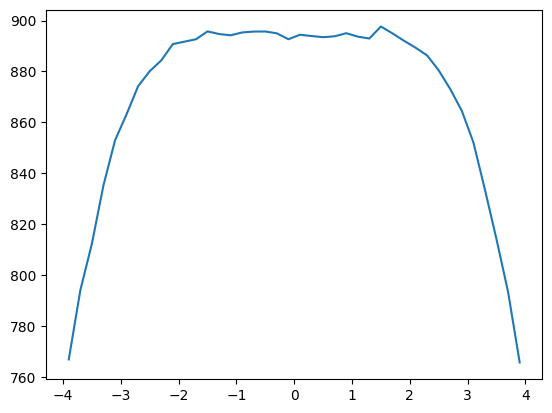

In [79]:
plt.plot(ybin_center,(yparticle_list[0]+yparticle_list[1]+yparticle_list[3]+yparticle_list[4]+yparticle_list[5])/(2000*0.2),label=str(0))